In [92]:
import pandas as pd
import csv as cv
import numpy as np
import matplotlib.pyplot as plt

In [93]:
prcl_df = pd.read_csv('Prcl.csv')
prcl_df.head()

,id,VacantLot,Condominium,NbrOfUnits,NbrOfApts,ResSalePrice,VacBldgYear,ZIP
0,1_34_0,False,False,0,0,"5,000.00",0,63102
1,18_30_0,True,False,0,0,"85,000.00",0,63102
2,27_70_0,False,False,0,1,"210,000.00",0,63102
3,44.04_50_0,True,False,0,0,"94,955.00",2004,63102
4,49_80_0,False,False,0,0,"40,000.00",0,63102


In [94]:
new_df = pd.read_csv('residential_data.csv')
new_df.head()

,id,BillYear,TaxAmt,TotalValue,TaxBal,ResTaxAmt
0,68_20_7,2015,4386.24,17210,0.0,1306.20
1,68_20_7,2016,4768.46,17210,0.0,1442.51
2,68_20_7,2017,4719.38,17210,0.0,1424.23
3,68_20_7,2018,4786.11,17210,0.0,1449.08
4,97_10_0,2015,3227.48,36920,0.0,2802.15


In [95]:
merg_df = pd.merge(prcl_df, new_df,  how='inner', on = ['id'])
merg_df.head()

,id,VacantLot,Condominium,NbrOfUnits,NbrOfApts,ResSalePrice,VacBldgYear,ZIP,BillYear,TaxAmt,TotalValue,TaxBal,ResTaxAmt
0,99_31_0,False,True,1,0,"106,000.00",0,63102,2015,1906.60,24170,0.0,1834.45
1,99_31_0,False,True,1,0,"106,000.00",0,63102,2016,2100.97,24170,0.0,2025.88
2,99_31_0,False,True,1,0,"106,000.00",0,63102,2017,2201.09,25690,0.0,2126.00
3,99_31_0,False,True,1,0,"106,000.00",0,63102,2018,2238.19,25690,0.0,2163.10
4,99_36_0,False,True,1,0,"163,000.00",0,63102,2015,2198.49,27870,0.0,2115.28


In [96]:
len(merg_df.index)

243573

In [97]:
df_2018 = merg_df.loc[merg_df['BillYear']==2018]
df_2017 = merg_df.loc[merg_df['BillYear']==2017]
df_2016 = merg_df.loc[merg_df['BillYear']==2016]
df_2015 = merg_df.loc[merg_df['BillYear']==2015]

print(f'counts {len(df_2018.index)} and {len(df_2017.index)} and {len(df_2016.index)} and {len(df_2015.index)}')

counts 61313 and 61055 and 60743 and 60462


In [98]:
grp_df_2018 = df_2018.groupby(["ZIP"])
vac_cnt_2018 = grp_df_2018.apply(lambda x: (x != False).sum())['VacantLot']

grp_df_2017 = df_2017.groupby(["ZIP"])
vac_cnt_2017 = grp_df_2017.apply(lambda x: (x != False).sum())['VacantLot']

grp_df_2016 = df_2016.groupby(["ZIP"])
vac_cnt_2016 = grp_df_2016.apply(lambda x: (x != False).sum())['VacantLot']

grp_df_2015 = df_2015.groupby(["ZIP"])
vac_cnt_2015 = grp_df_2015.apply(lambda x: (x != False).sum())['VacantLot']

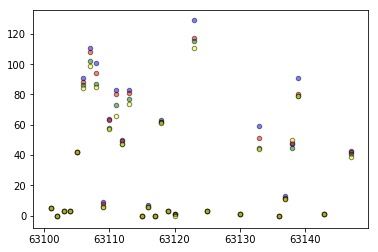

In [99]:
# x axis
uniq_zip = merg_df['ZIP'].unique()

plt.scatter(uniq_zip, vac_cnt_2018, marker="o", facecolors="blue", edgecolors="black", s=20, alpha=0.5, label="2018")
plt.scatter(uniq_zip, vac_cnt_2017, marker="o", facecolors="red", edgecolors="black", s=20, alpha=0.5, label="2017")
plt.scatter(uniq_zip, vac_cnt_2016, marker="o", facecolors="green", edgecolors="black", s=20, alpha=0.5, label="2016")
plt.scatter(uniq_zip, vac_cnt_2015, marker="o", facecolors="yellow", edgecolors="black", s=20, alpha=0.5, label="2015")

plt.show()

In [100]:
totVal_df_2018 = grp_df_2018['TotalValue'].mean()
totVal_df_2017 = grp_df_2017['TotalValue'].mean()
totVal_df_2016 = grp_df_2016['TotalValue'].mean()
totVal_df_2015 = grp_df_2015['TotalValue'].mean()



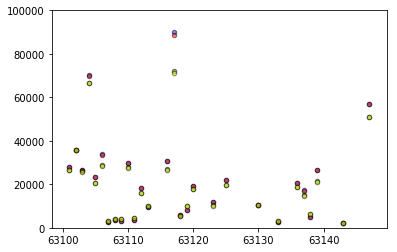

In [105]:
plt.scatter(uniq_zip, totVal_df_2018, marker="o", facecolors="blue", edgecolors="black", s=20, alpha=0.5, label="2018")
plt.scatter(uniq_zip, totVal_df_2017, marker="o", facecolors="red", edgecolors="black", s=20, alpha=0.5, label="2017")
plt.scatter(uniq_zip, totVal_df_2016, marker="o", facecolors="green", edgecolors="black", s=20, alpha=0.5, label="2016")
plt.scatter(uniq_zip, totVal_df_2015, marker="o", facecolors="yellow", edgecolors="black", s=20, alpha=0.5, label="2015")

plt.ylim(0, 100000)
     
plt.show()

<BarContainer object of 29 artists>

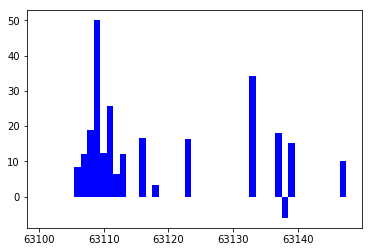

In [116]:
vac_per_chg = (vac_cnt_2018-vac_cnt_2015)/vac_cnt_2015*100
vac_per_chg = vac_per_chg.fillna(0)

plt.bar(uniq_zip, vac_per_chg, 1, color="blue")

<BarContainer object of 29 artists>

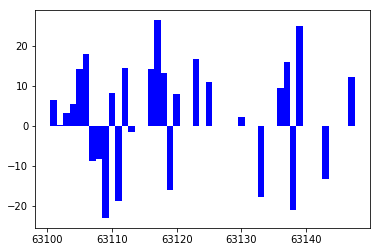

In [118]:
val_per_chg = (totVal_df_2018-totVal_df_2015)/totVal_df_2015*100
val_per_chg = val_per_chg.fillna(0)
plt.bar(uniq_zip, val_per_chg, 1, color="blue")

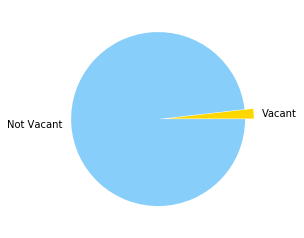

In [130]:
grp_df_2018 = df_2018.groupby(["ZIP"])
vac_true_2018 = grp_df_2018.apply(lambda x: (x != False).sum())['VacantLot']
tot_true_2018 = vac_true_2018.sum()
vac_false_2018 = grp_df_2018.apply(lambda x: (x != True).sum())['VacantLot']
tot_false_2018 = vac_false_2018.sum()
vac_total = [tot_true_2018 , tot_false_2018]

# Build Pie Chart
# Labels for the sections of our pie chart
labels = ["Vacant","Not Vacant"]

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0.1)

plt.pie(vac_total, explode=explode, labels=labels, colors=colors)

plt.show()

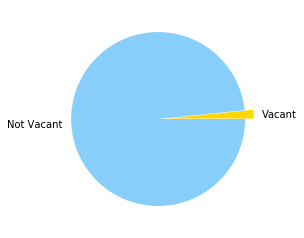

In [132]:
grp_df_2015 = df_2015.groupby(["ZIP"])
vac_true_2015 = grp_df_2015.apply(lambda x: (x != False).sum())['VacantLot']
tot_true_2015 = vac_true_2015.sum()
vac_false_2015 = grp_df_2015.apply(lambda x: (x != True).sum())['VacantLot']
tot_false_2015 = vac_false_2015.sum()
vac_total = [tot_true_2015 , tot_false_2015]

# Build Pie Chart
# Labels for the sections of our pie chart
labels = ["Vacant","Not Vacant"]

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0.1)

plt.pie(vac_total, explode=explode, labels=labels, colors=colors)

plt.show()

In [133]:
mylist = [tot_true_2015,tot_true_2018,tot_false_2015,tot_false_2018]
mylist

[980, 1106, 59482, 60207]